# Exploratory Data Analysis (EDA) - Dataset Challenge N1 - Credit Cards Frauds

## Importando librerías

In [11]:
import time
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

## Inicialización de configuraciones, variables y datos

In [12]:
start = time.time()
sns.set_style("white")
# Levantando partes del dataset
csvs = glob.glob(r".\Datasets\*.txt")
Dataset = pd.DataFrame()
for csv in csvs:
    Dataset = Dataset.append(pd.read_csv(csv, sep=',', index_col=None, header=0))

## Explorando propiedades y estructura del dataset

In [13]:
# Escribiendo el numero de registros y de columnas de la tabla
NumRows = Dataset.shape[0]
NumCols = Dataset.shape[1]
print("El dataset tiene {0} registros y {1} columnas \n".format(NumRows, NumCols))
# Inspeccion visual del formato y estructura de la tabla
print("Muestra de los primeros 5 registros de la tabla:\n")
print(Dataset.head())
# Información sobre los campos del dataset
print("\nInformación sobre los campos del dataset:\n")
Dataset.info()
print("\nEstadísticos descriptivos del dataset:\n")
Dataset.describe()

El dataset tiene 256326 registros y 34 columnas 

Muestra de los primeros 5 registros de la tabla:

       Time        V1        V2        V3        V4        V5        V6  \
0  109530.0  1.641504 -0.118108  0.193331  3.544888  0.601648  2.965813   
1   53102.0  1.331932 -0.579479  0.927182 -0.551507 -1.473758 -1.026256   
2  140517.0  1.973157 -0.944394  0.124453 -0.092508 -1.751058 -1.212101   
3   79305.0 -1.435908  1.524430  1.129484  1.118073  0.823542  0.385199   
4   32491.0  1.191111  0.253410  0.396854  0.727996 -0.421515 -0.810615   

         V7        V8        V9  ...       V24       V25       V26       V27  \
0 -1.257025  0.866142  1.035425  ... -1.091525 -0.737340 -0.127210  0.030250   
1 -0.764831 -0.189192 -0.665700  ...  0.765715  0.422733 -0.129021  0.027417   
2 -0.851435 -0.177842 -0.037161  ...  0.886448 -0.879357  0.213429 -0.014208   
3  0.745317  0.685064 -1.904515  ... -0.329870  0.537772 -0.000692 -0.241396   
4 -0.044980 -0.035763  0.140102  ...  0.335860  0

Time             V1             V2             V3  \
count  256326.000000  256326.000000  256326.000000  256326.000000   
mean    94802.094009       0.000534       0.001652       0.000495   
std     47482.789613       1.954440       1.645344       1.514818   
min         0.000000     -56.407510     -72.715728     -48.325589   
25%     54141.250000      -0.920803      -0.598655      -0.889745   
50%     84711.000000       0.018303       0.066399       0.179703   
75%    139304.000000       1.315349       0.804679       1.028073   
max    172792.000000       2.454930      22.057729       9.382558   

                  V4             V5             V6             V7  \
count  256326.000000  256326.000000  256326.000000  256326.000000   
mean        0.000817      -0.000014       0.000251      -0.000600   
std         1.415525       1.379010       1.332339       1.239475   
min        -5.683171    -113.743307     -26.160506     -43.557242   
25%        -0.847813      -0.691673      -0.768846      -0.554232   
50%        -0.020248      -0.054580      -0.274421       0.040103   
75%         0.744292       0.612640       0.398602       0.570272   
max        16.875344      34.801666      73.301626     120.589494   

                  V8             V9  ...            V22            V23  \
count  256326.000000  256326.000000  ...  256326.000000  256326.000000   
mean       -0.000454       0.000476  ...      -0.000401      -0.000224   
std         1.199836       1.099124  ...       0.726421       0.624855   
min       -73.216718     -13.434066  ...     -10.933144     -44.807735   
25%        -0.208713      -0.642961  ...      -0.542743      -0.161692   
50%         0.022115      -0.051257  ...       0.006119      -0.010893   
75%         0.327517       0.597535  ...       0.527867       0.147475   
max        20.007208      15.594995  ...      10.503090      22.083545   

                 V24            V25            V26            V27  \
count  256326.000000  256326.000000  256326.000000  256326.000000   
mean        0.000383      -0.000698       0.000342      -0.000126   
std         0.605410       0.521757       0.482516       0.404940   
min        -2.836627     -10.295397      -2.604551     -22.565679   
25%        -0.354272      -0.317604      -0.326866      -0.070934   
50%         0.041451       0.016559      -0.052272       0.001300   
75%         0.439918       0.350422       0.241376       0.091012   
max         4.584549       7.519589       3.517346      31.612198   

                 V28         Amount     Card_Limit          Class  
count  256326.000000  256326.000000  256326.000000  256326.000000  
mean       -0.000381      88.077874   10265.061266       0.001728  
std         0.328364     249.519831    5628.091310       0.041537  
min       -15.430084       0.000000     500.000000       0.000000  
25%        -0.052970       5.550000    5393.000000       0.000000  
50%         0.011222      22.000000   10261.000000       0.000000  
75%         0.078239      77.010000   15151.000000       0.000000  
max        33.847808   25691.160000   19999.000000       1.000000  

[8 rows x 32 columns]

## Realizando exploración mediante tablas y gráficos

In [14]:
# Analizando la cantidad de registros por cada clase
Data_Analysis = Dataset.groupby(by='Class').agg({'Amount':'count'}).reset_index().rename(columns={'Amount':'Count'})
Data_Analysis['porcentaje'] = (Data_Analysis['Count']/NumRows)*100
print("\nCantidad de registros por clase:\n\n",Data_Analysis)
# Analizando la cantidad de registros por franquicia
Data_Analysis = Dataset.groupby(by='Card_Franchise').agg({'Amount':'count'}).reset_index().rename(columns={'Amount':'Count'})
Data_Analysis['porcentaje'] = (Data_Analysis['Count']/NumRows)*100
print("\nCantidad de registros por franquicia:\n\n",Data_Analysis)
# Analizando la cantidad de registros por clase según franquicia
Data_Analysis = Dataset.groupby(by=['Card_Franchise', 'Class']).agg({'Amount':'count'}).reset_index()\
                       .rename(columns={'Amount':'Count'})
Data_Analysis['porcentaje'] = (Data_Analysis['Count']/NumRows)*100
print("\nCantidad de registros por clase según franquicia:\n\n",Data_Analysis)
# Analizando la cantidad de registros por estado de transacción
Data_Analysis = Dataset.groupby(by='Status').agg({'Amount':'count'}).reset_index().rename(columns={'Amount':'Count'})
Data_Analysis['porcentaje'] = (Data_Analysis['Count']/NumRows)*100
print("\nCantidad de registros por estado de transacción:\n\n",Data_Analysis)
# Analizando la cantidad de registros por clase según franquicia
Data_Analysis = Dataset.groupby(by=['Status', 'Class']).agg({'Amount':'count'}).reset_index()\
                       .rename(columns={'Amount':'Count'})
Data_Analysis['porcentaje'] = (Data_Analysis['Count']/NumRows)*100
print("\nCantidad de registros por clase según estado de transacción:\n\n",Data_Analysis)
print("\n")


Cantidad de registros por clase:

    Class   Count  porcentaje
0      0  255883   99.827173
1      1     443    0.172827

Cantidad de registros por franquicia:

   Card_Franchise   Count  porcentaje
0           AMEX   38627   15.069482
1         Master   89578   34.946904
2           VISA  128121   49.983615

Cantidad de registros por clase según franquicia:

   Card_Franchise  Class   Count  porcentaje
0           AMEX      0   38555   15.041393
1           AMEX      1      72    0.028089
2         Master      0   89434   34.890725
3         Master      1     144    0.056178
4           VISA      0  127894   49.895056
5           VISA      1     227    0.088559

Cantidad de registros por estado de transacción:

      Status   Count  porcentaje
0  approved  212827   83.029814
1  rejected   43499   16.970186

Cantidad de registros por clase según estado de transacción:

      Status  Class   Count  porcentaje
0  approved      0  212470   82.890538
1  approved      1     357    0.13927

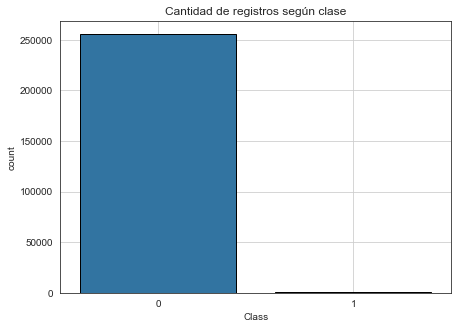

In [15]:
# Gráfico de barras con la cantidad de registros según clase
plt.figure(figsize=(7, 5))
ax = sns.countplot(x="Class", data=Dataset, edgecolor='k')
plt.title("Cantidad de registros según clase")
plt.grid()
plt.show()

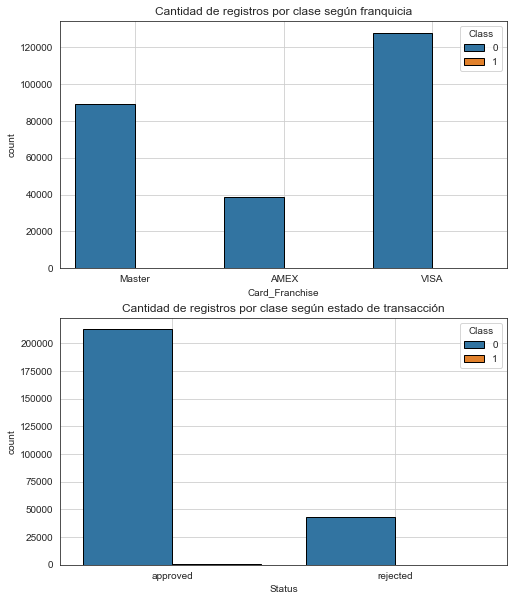

In [16]:
# Gráfico de barras con la cantidad de registros según clase
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))
sns.countplot(x="Card_Franchise", hue="Class" ,data=Dataset, edgecolor='k', ax=axs[0])
axs[0].set_title("Cantidad de registros por clase según franquicia")
axs[0].grid()
sns.countplot(x="Status", hue="Class" ,data=Dataset, edgecolor='k', ax=axs[1])
axs[1].set_title("Cantidad de registros por clase según estado de transacción")
axs[1].grid()

In [17]:
# Estandarizando variables con magnitudes elevadas
Dataset["Time_scaled"] = scale(Dataset["Time"], with_mean=True, with_std=True)
Dataset["Amount_scaled"] = scale(Dataset["Amount"], with_mean=True, with_std=True)
Dataset["Card_Limit_scaled"] = scale(Dataset["Card_Limit"], with_mean=True, with_std=True)

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


Text(0.5,1,'Box-plots variables numéricas')

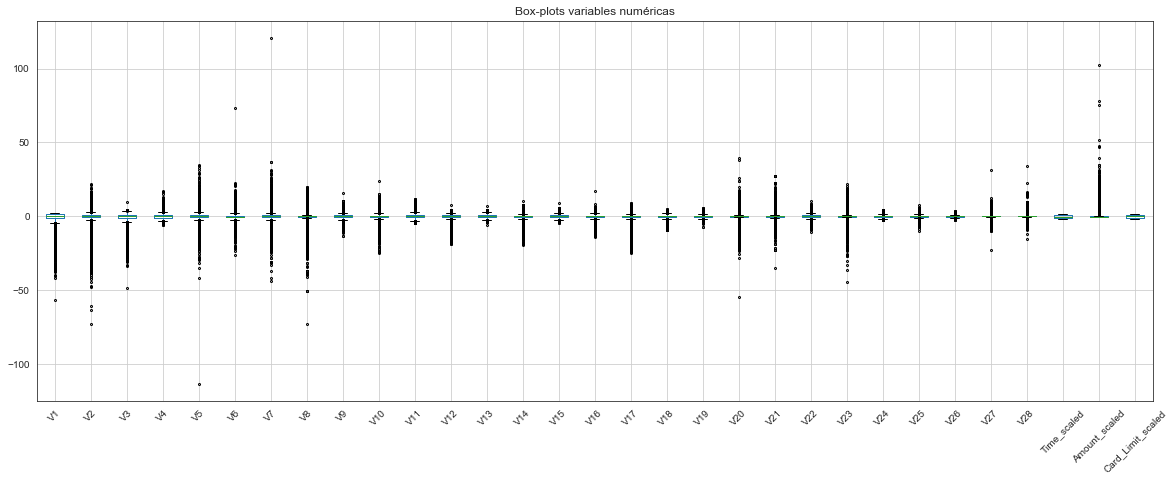

In [18]:
# Gráfico de box-plot de las variables numéricas
plt.figure(figsize=(20, 7))
Num_Cols = [col for col in Dataset.select_dtypes(include=['int64', 'float64']).columns if col not in ['Time','Amount','Card_Limit','Class']]
Dataset.boxplot(column=Num_Cols, rot=45, flierprops={'marker':'o', 'markersize':2})
plt.title("Box-plots variables numéricas")

Mapa de calor de las correlaciones entre features numéricos:


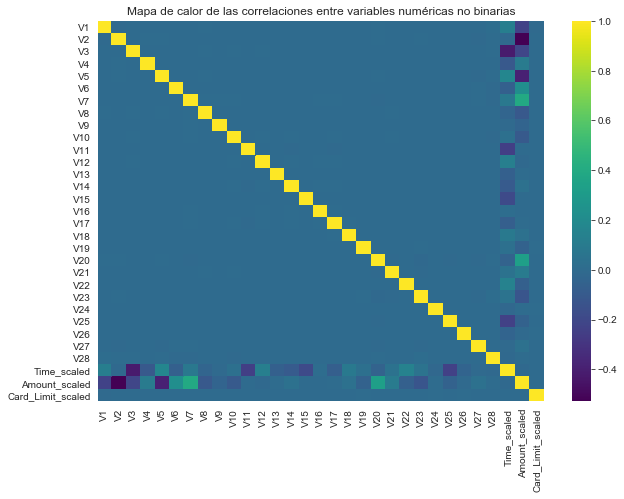

In [19]:
# Matriz de correlaciones entre las features del dataset
print("Mapa de calor de las correlaciones entre features numéricos:")
plt.figure(figsize=(10, 7))
sns.heatmap(Dataset[Num_Cols].corr(), cmap = "viridis")\
   .set_title('Mapa de calor de las correlaciones entre variables numéricas no binarias')
plt.show()

C:\Users\Public\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 3600x1080 with 0 Axes>

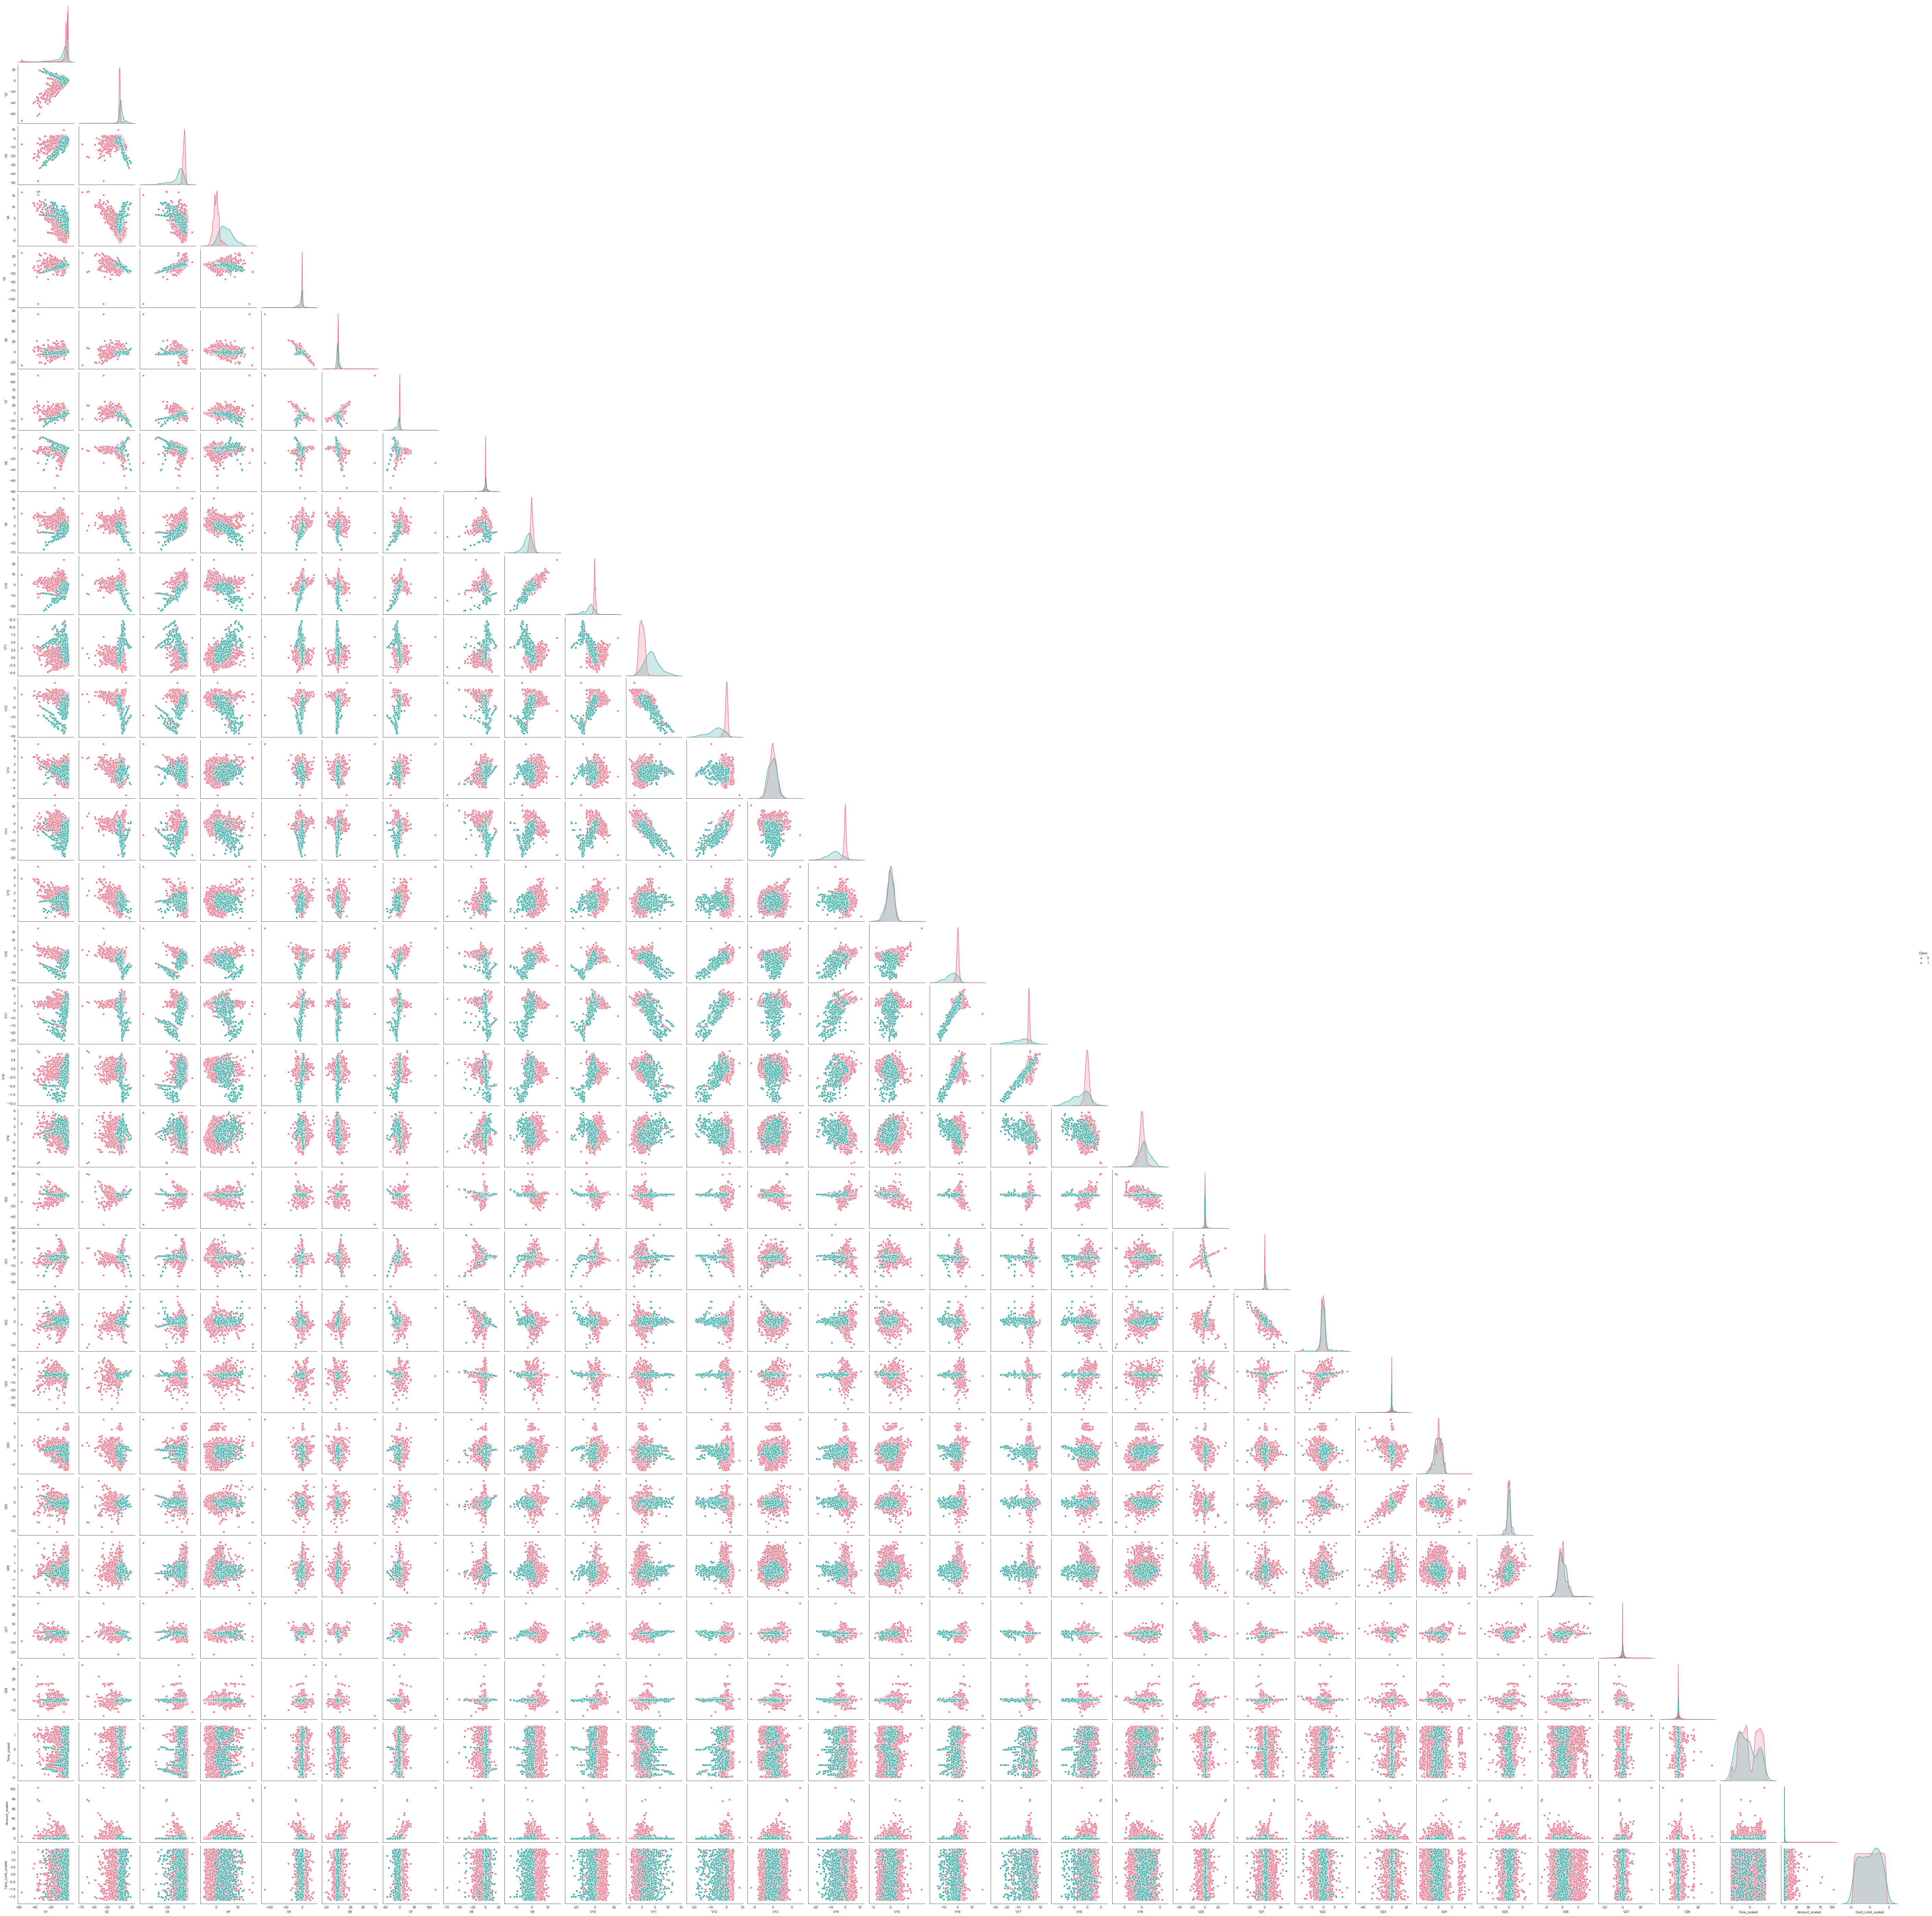

In [20]:
# Gráfico scatter-plot matrix (pairplot) de las variables numéricas
Num_Cols = [col for col in Dataset.select_dtypes(include=['int64', 'float64']).columns if col not in ['Time','Amount','Card_Limit']]
plt.figure(figsize=(50, 15))
sns.pairplot(Dataset[Num_Cols], hue="Class", palette="husl", corner=True)
plt.title("Scatter-plot Matrix (pairplot) de las variables numéricas")
plt.show()

In [21]:
end = time.time()
print("Total Execution Time: {} seconds".format(end-start))

Total Execution Time: 1173.0634939670563 seconds


## Comentarios e insights encontrados


1. Los features Time, Amount y Card_Limit tienen magnitudes considerablemente mayores que el resto de features
2. Se identifican outliers EXTREMOS en algunas de las features
3. Las variable agregada "Card_Limit" y las estandarizadas NO están correlacionadas entre sí ni con el resto (PCAs)
4. Se pueden seleccionar variables para la construcción de un modelo utilizando el scatter-plot matrix
